In [4]:

import pandas as pd
import warnings
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas.errors import SettingWithCopyWarning  


In [5]:
# Suppress warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [14]:
# Load the data
df = pd.read_excel(r'C:\Users\K.uday\Desktop\s&p 500 and apple inc.xlsx', index_col=0)
df.head()

,Apple,S&P 500
2011-05-13,12.161,1337.77
2011-05-16,11.904,1329.47
2011-05-17,12.005,1328.98
2011-05-18,12.138,1340.68
2011-05-19,12.162,1343.60


In [17]:

if 'S&P 500 Returns' not in df.columns:
    df.insert(loc=1, column='S&P 500 Returns', value=['' for i in range(df.shape[0])])

if 'Apple Returns' not in df.columns:
    df.insert(loc=3, column='Apple Returns', value=['' for i in range(df.shape[0])])

df.head()


,Apple,S&P 500 Returns,S&P 500,Apple Returns
2011-05-13,12.161,,1337.77,
2011-05-16,11.904,,1329.47,
2011-05-17,12.005,,1328.98,
2011-05-18,12.138,,1340.68,
2011-05-19,12.162,,1343.60,


In [19]:
# Calculate daily returns
df['S&P 500 Returns'][0] = 0
df['Apple Returns'][0] = 0
for i in range(len(df)-1):
    df['S&P 500 Returns'][i+1] = (df['S&P 500'][i+1] - df['S&P 500'][i]) / df['S&P 500'][i]
    df['Apple Returns'][i+1] = (df['Apple'][i+1] - df['Apple'][i]) / df['Apple'][i]
df.head()

,Apple,S&P 500 Returns,S&P 500,Apple Returns
2011-05-13,12.161,0,1337.77,0
2011-05-16,11.904,-0.006204,1329.47,-0.021133
2011-05-17,12.005,-0.000369,1328.98,0.008485
2011-05-18,12.138,0.008804,1340.68,0.011079
2011-05-19,12.162,0.002178,1343.60,0.001977


In [20]:
# Select returns and prices
df_returns = df.iloc[1:, [1, 3]]
df_prices = df.iloc[1:, [0, 2]]
df.head()

,Apple,S&P 500 Returns,S&P 500,Apple Returns
2011-05-13,12.161,0,1337.77,0
2011-05-16,11.904,-0.006204,1329.47,-0.021133
2011-05-17,12.005,-0.000369,1328.98,0.008485
2011-05-18,12.138,0.008804,1340.68,0.011079
2011-05-19,12.162,0.002178,1343.60,0.001977


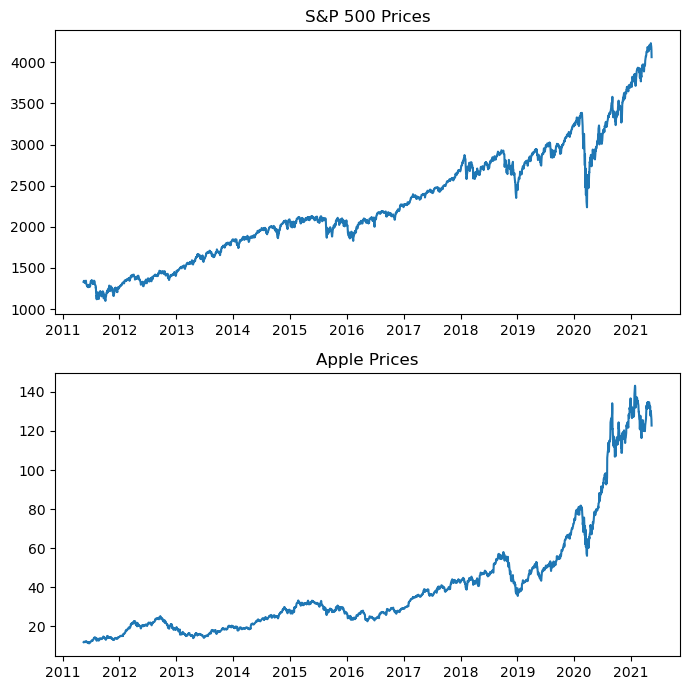

In [21]:
# Plot prices
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
axes[0].plot(df_prices['S&P 500'])
axes[0].set_title('S&P 500 Prices')
axes[1].plot(df_prices['Apple'])
axes[1].set_title('Apple Prices')
plt.tight_layout()
plt.show()

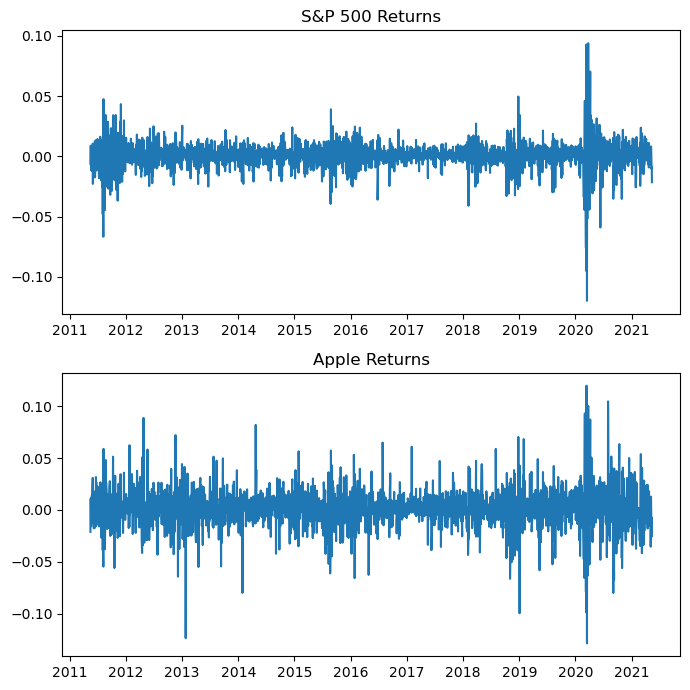

In [23]:
# Plot returns
df_returns['S&P 500 Returns'] = df_returns['S&P 500 Returns'].astype(float)
df_returns['Apple Returns'] = df_returns['Apple Returns'].astype(float)
df.head()
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
axes[0].plot(df_returns['S&P 500 Returns'])
axes[0].set_title('S&P 500 Returns')
axes[1].plot(df_returns['Apple Returns'])
axes[1].set_title('Apple Returns')
plt.tight_layout()
plt.show()

C:\Users\K.uday\AppData\Local\Temp\ipykernel_10628\1204995254.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='blue', label='Normal Distribution')


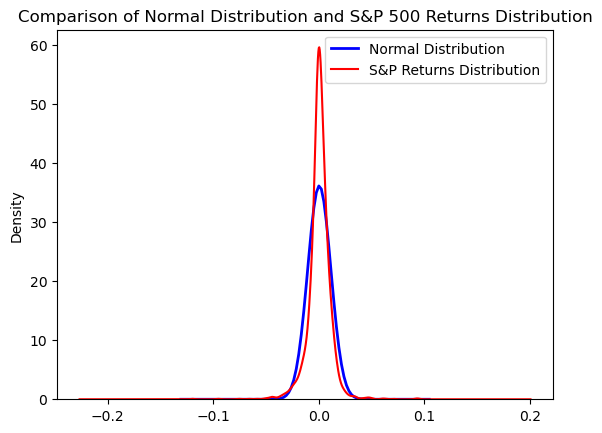

In [24]:
# Analyze S&P 500 Returns distribution
lst = [round(i, 3) for i in df_returns['S&P 500 Returns'].values]
lst = np.asarray(lst)
mu, std = norm.fit(lst)
plt.hist(lst, bins=25, density=True, alpha=0.6, color='white')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color='blue', label='Normal Distribution')
title = "Comparison of Normal Distribution and S&P 500 Returns Distribution"
plt.title(title)
df_returns['S&P 500 Returns'].plot.kde(color='red', label='S&P Returns Distribution')
plt.legend()
plt.show()


C:\Users\K.uday\AppData\Local\Temp\ipykernel_10628\3067726367.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='blue', label='Normal Distribution')


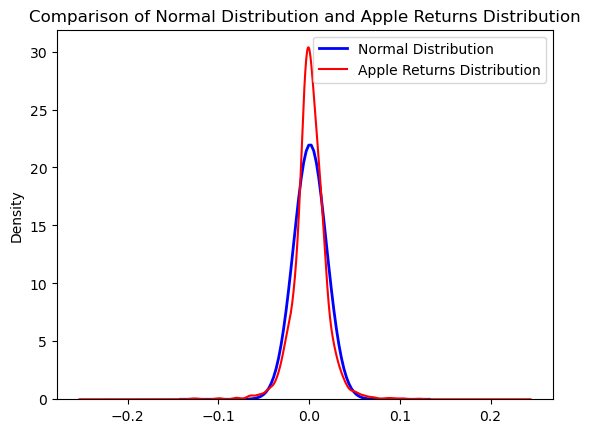

In [25]:
# Analyze Apple Returns distribution
lst = [round(i, 3) for i in df_returns['Apple Returns'].values]
lst = np.asarray(lst)
mu, std = norm.fit(lst)
plt.hist(lst, bins=25, density=True, alpha=0.6, color='white')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color='blue', label='Normal Distribution')
title = "Comparison of Normal Distribution and Apple Returns Distribution"
plt.title(title)
df_returns['Apple Returns'].plot.kde(color='red', label='Apple Returns Distribution')
plt.legend()
plt.show()

In [26]:
# Correlation analysis
correlation = df_returns.corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                 S&P 500 Returns  Apple Returns
S&P 500 Returns         1.000000       0.656869
Apple Returns           0.656869       1.000000


In [27]:
# Linear regression analysis
X = df_returns['S&P 500 Returns']
y = df_returns['Apple Returns']
X2 = sm.add_constant(X)
model = sm.OLS(y, X2)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          Apple Returns   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     1907.
Date:                Thu, 19 Dec 2024   Prob (F-statistic):          1.68e-310
Time:                        08:13:10   Log-Likelihood:                 7227.3
No. Observations:                2515   AIC:                        -1.445e+04
Df Residuals:                    2513   BIC:                        -1.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0005      0.000     